In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection  import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import f_regression

In [2]:
### Обучение и выполнение лучшей модели

In [3]:
# Путь к тренировочному набору
path_train = 'train_house_A.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test = 'test_house_A.csv'# содержит только имя файла, без имен папок

In [4]:
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [5]:
X = df_train.drop(columns = ['price'])
y = df_train['price']

In [6]:
col = ['0', '4', '5', '6', '7', '9', '12', '13', '16', '21',
       '22', '24', '25', '28']

In [7]:
X = X.loc[:, col]

In [8]:
model_target = TransformedTargetRegressor(
               regressor = Pipeline(steps=[
                                ('estimator', RandomForestRegressor(criterion='absolute_error', max_depth=8, min_samples_leaf=1, min_samples_split=9, n_estimators=40))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False
)

model_target.fit(X,y)

TransformedTargetRegressor(check_inverse=False,
                           regressor=Pipeline(steps=[('estimator',
                                                      RandomForestRegressor(criterion='absolute_error',
                                                                            max_depth=8,
                                                                            min_samples_split=9,
                                                                            n_estimators=40))]),
                           transformer=PowerTransformer())

In [9]:
# Блок предсказания с использованием тестового набора

In [10]:
mask = col
X_test = pd.read_csv(path_test)[mask]

y_pred = model_target.predict(X_test)
print(y_pred)

[6375747.44195218 6540858.15855931 3130449.42060486 4743110.25086385
 3940441.48703014 3759290.53294641 8080180.71799984 7591544.41607909
 3583334.4018924  6751238.28401104 8247822.53951122 4011779.48153564
 4983557.35321962 3922027.98438167 3990602.69359739 7533424.95466228
 4400657.25649856 5648491.01229037 4722916.01670764 6508744.39953115
 3267753.31921918 3551059.94240435 5577559.32862685 3432024.27638642
 3556624.74746044 3844574.96127322 5510243.9318986  3145653.71029842
 2861235.91200762 4213125.62469274 3143958.15571342 6782102.23450047
 4975100.34499224 4207115.55745739 5061165.05586554 3370343.58267341
 4367906.19886262 2724081.35033019 5110315.95512373 5583046.34605268
 6388216.34671324 4650827.7750598  8450486.9215954  4523883.92759274
 3318209.14978289 5894400.99420835 4514447.4613881  2681769.97881084
 4653087.0599962  2649029.84729116 4853526.78033569 2772519.36755357
 6533273.99090454 5251257.3994716  3288849.77107821 5294260.92881569
 5774415.74748352 4133601.73303126

In [11]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора

In [12]:
y_predict = y_pred
y_predict

array([6375747.44195218, 6540858.15855931, 3130449.42060486,
       4743110.25086385, 3940441.48703014, 3759290.53294641,
       8080180.71799984, 7591544.41607909, 3583334.4018924 ,
       6751238.28401104, 8247822.53951122, 4011779.48153564,
       4983557.35321962, 3922027.98438167, 3990602.69359739,
       7533424.95466228, 4400657.25649856, 5648491.01229037,
       4722916.01670764, 6508744.39953115, 3267753.31921918,
       3551059.94240435, 5577559.32862685, 3432024.27638642,
       3556624.74746044, 3844574.96127322, 5510243.9318986 ,
       3145653.71029842, 2861235.91200762, 4213125.62469274,
       3143958.15571342, 6782102.23450047, 4975100.34499224,
       4207115.55745739, 5061165.05586554, 3370343.58267341,
       4367906.19886262, 2724081.35033019, 5110315.95512373,
       5583046.34605268, 6388216.34671324, 4650827.7750598 ,
       8450486.9215954 , 4523883.92759274, 3318209.14978289,
       5894400.99420835, 4514447.4613881 , 2681769.97881084,
       4653087.0599962 ,

## Использованные признаки

In [13]:
print(col)

['0', '4', '5', '6', '7', '9', '12', '13', '16', '21', '22', '24', '25', '28']


(137,) (137,)
Отрицательные цены -  0
Max Error: 5,760,568
 
----------------------
   MAPE Error: 17.52
----------------------


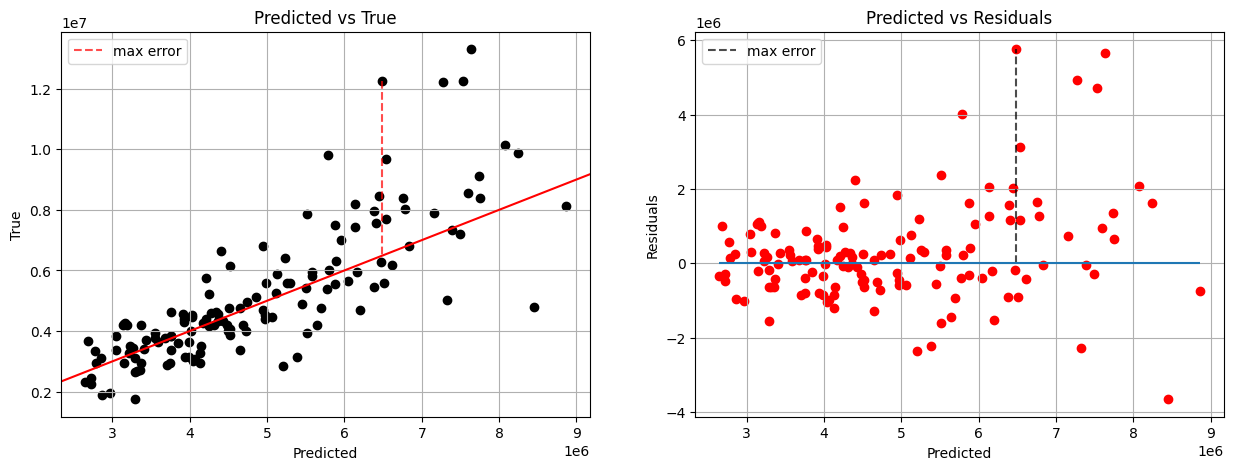

In [14]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_A.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [15]:
mask = col

import pickle
with open('saved_dictionary_a.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,1,1
1,16,airconditioning
2,6,area
3,4,area bathrooms
4,25,area bedrooms
5,10,area stories
6,5,basement
7,7,bathrooms
8,28,bathrooms stories
9,21,bedrooms
